In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('yolov11_droprate_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                               image_name image_size  threshold  true_keypoints  pred_keypoints  total_visible  detected_count  drop_rate
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.1              17              17             17              17   0.000000
1  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.5              17              17             17              17   0.000000
2  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.9              17              17             17              17   0.000000
3  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256        0.1              17              17             12               4  66.666667
4  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256        0.5              17              17             12              12   0.000000


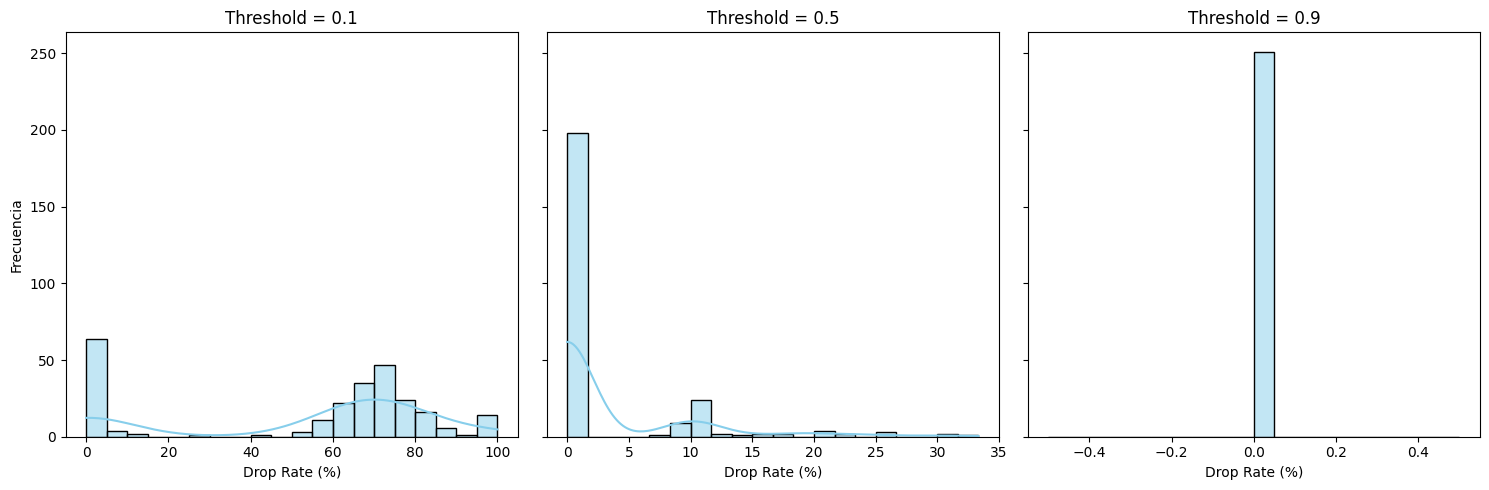

In [3]:
thresholds = df['threshold'].unique()
n_thresholds = len(thresholds)
# Crear figura con subgráficos
fig, axes = plt.subplots(1, n_thresholds, figsize=(15, 5), sharey=True)

# Iterar por cada threshold y dibujar su histograma
for i, threshold in enumerate(thresholds):
    subset = df[df['threshold'] == threshold]
    sns.histplot(subset['drop_rate'], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Threshold = {threshold}')
    axes[i].set_xlabel('Drop Rate (%)')
    if i == 0:
        axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

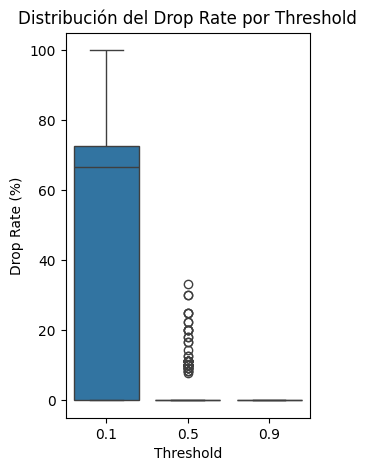

In [4]:
# 2. Gráfico de caja del drop_rate por threshold
plt.figure(figsize=(3.15, 5))
sns.boxplot(x='threshold', y='drop_rate', data=df)
plt.title('Distribución del Drop Rate por Threshold')
plt.xlabel('Threshold')
plt.ylabel('Drop Rate (%)')
plt.show()

In [5]:
droprate_stats = df.groupby('threshold')['drop_rate'].describe()
print(droprate_stats.to_string())

           count       mean        std  min       25%        50%        75%         max
threshold                                                                              
0.1         70.0  52.767620  33.503582  0.0  7.536765  69.615385  75.000000  100.000000
0.5         70.0  14.255356  17.346414  0.0  0.000000   9.545455  20.000000   77.777778
0.9         70.0   4.860972   9.846379  0.0  0.000000   0.000000   8.901515   55.555556
